In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pysentani as sti
from io import StringIO
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
survey['access_type'] = sti.access_type(survey)

Building on Josh's data to estimate electricity use for all households in each village. Average daily energy use by PLN Grid villages appears to be between 2-4 kWh energy use per day. * kheleubelow responses contain reporting of large values for use hours. I suspect that many of the irregular rice cooker hours are coming from this village.

In [2]:
Table_1 = '''Village,Official_count,Sat_Count,Village_Surveyed,Access Type
Abar,40,45,46,Non-Centralized
Ajau_Evale_Hobong,100,84,56,PLN Grid
Asei,40,40,29,PLN Grid
Atamali,40,38,35,Community Microgrid
Ayapo,120,140,120,PLN Microgrid
Babrongko, 65,120,67, PLN Grid
Burawai,20,16,8,PLN Grid
Donday,50,57,50,PLN Microgrid
Ebunfauw,50,39,36,Non-Centralized
Flafow,N/A,N/A,N/A,PLN Grid
Kalio,40,39,30,Non-Centralized
Kampung_Baru,25,54,36,Non-Centralized
Kensio,20,19,19,Community Microgrid
Khageuw,15,27,16,Non-Centralized
Khamayakha,50,104,14,PLN Grid
Kheleubulow,N/A,N/A,52,PLN Grid
Kwadeware,30,27,30,PLN Grid
Obolyo,18,18,11,Non-Centralized
Pantai_Yahim,30,27,13,PLN Grid
Puai,60,80,74,Non-Centralized
Simporo,65,113,62,PLN Grid
Sosiri,N/A,N/A,96,PLN Grid
Tanjung_Elmo,N/A,N/A,N/A,
Yakonde,70,55,59,PLN Grid
Yobeh,40,38,34,PLN Grid
Yoboi,70,64,49,Non-Centralized
Yoka,150,193,28,PLN Grid
Yokiwa,80,64,43,Non-Centralized'''

data = pd.read_csv(StringIO(Table_1))
#data['Village_Surveyed_to_Official_Ratio'] = data['Village_Surveyed']/data['Official_count']
#data['Village_Surveyed_to_Sat_Ratio'] = data['Village_Surveyed']/data['Sat_Count']

In [3]:
data.head()

,Village,Official_count,Sat_Count,Village_Surveyed,Access Type
0,Abar,40,45,46,Non-Centralized
1,Ajau_Evale_Hobong,100,84,56,PLN Grid
2,Asei,40,40,29,PLN Grid
3,Atamali,40,38,35,Community Microgrid
4,Ayapo,120,140,120,PLN Microgrid


In [4]:
data = data.dropna()

I want to calculate the projected daily energy for off grid villages assuming that full electrification is achieved. I select only for the three off grid locations to analyze.

In [5]:
off_grid_villages = data[data['Access Type'].str.contains('Community Microgrid|PLN Microgrid|Non-Centralized')]
off_grid_villages

,Village,Official_count,Sat_Count,Village_Surveyed,Access Type
0,Abar,40,45,46,Non-Centralized
3,Atamali,40,38,35,Community Microgrid
4,Ayapo,120,140,120,PLN Microgrid
7,Donday,50,57,50,PLN Microgrid
8,Ebunfauw,50,39,36,Non-Centralized
10,Kalio,40,39,30,Non-Centralized
11,Kampung_Baru,25,54,36,Non-Centralized
12,Kensio,20,19,19,Community Microgrid
13,Khageuw,15,27,16,Non-Centralized
17,Obolyo,18,18,11,Non-Centralized


I create a new column that multiplies the official village count (assumed to be the actual number of demand points.) by 3.5 (kWh) to reflect estimated daily energy use for the entire village. This calculation assumes that all households will use energy similarly.

In [6]:
off_grid_villages['total_daily_energy'] = off_grid_villages['Official_count'] * 3.5

/Users/Matt/miniconda3/envs/mrenv/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
off_grid_villages.head()

,Village,Official_count,Sat_Count,Village_Surveyed,Access Type,total_daily_energy
0,Abar,40,45,46,Non-Centralized,140
3,Atamali,40,38,35,Community Microgrid,140
4,Ayapo,120,140,120,PLN Microgrid,420
7,Donday,50,57,50,PLN Microgrid,175
8,Ebunfauw,50,39,36,Non-Centralized,175


Underscores removed from these two village names.

In [8]:
off_grid_villages.replace(to_replace = {'Village': {'Kampung_Baru': 'Kampung Baru',
                                        'Pantai_Yahim': 'Pantai Yahim'}},inplace = True)

/Users/Matt/miniconda3/envs/mrenv/lib/python3.4/site-packages/pandas/core/generic.py:2790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Seaborn bar graph

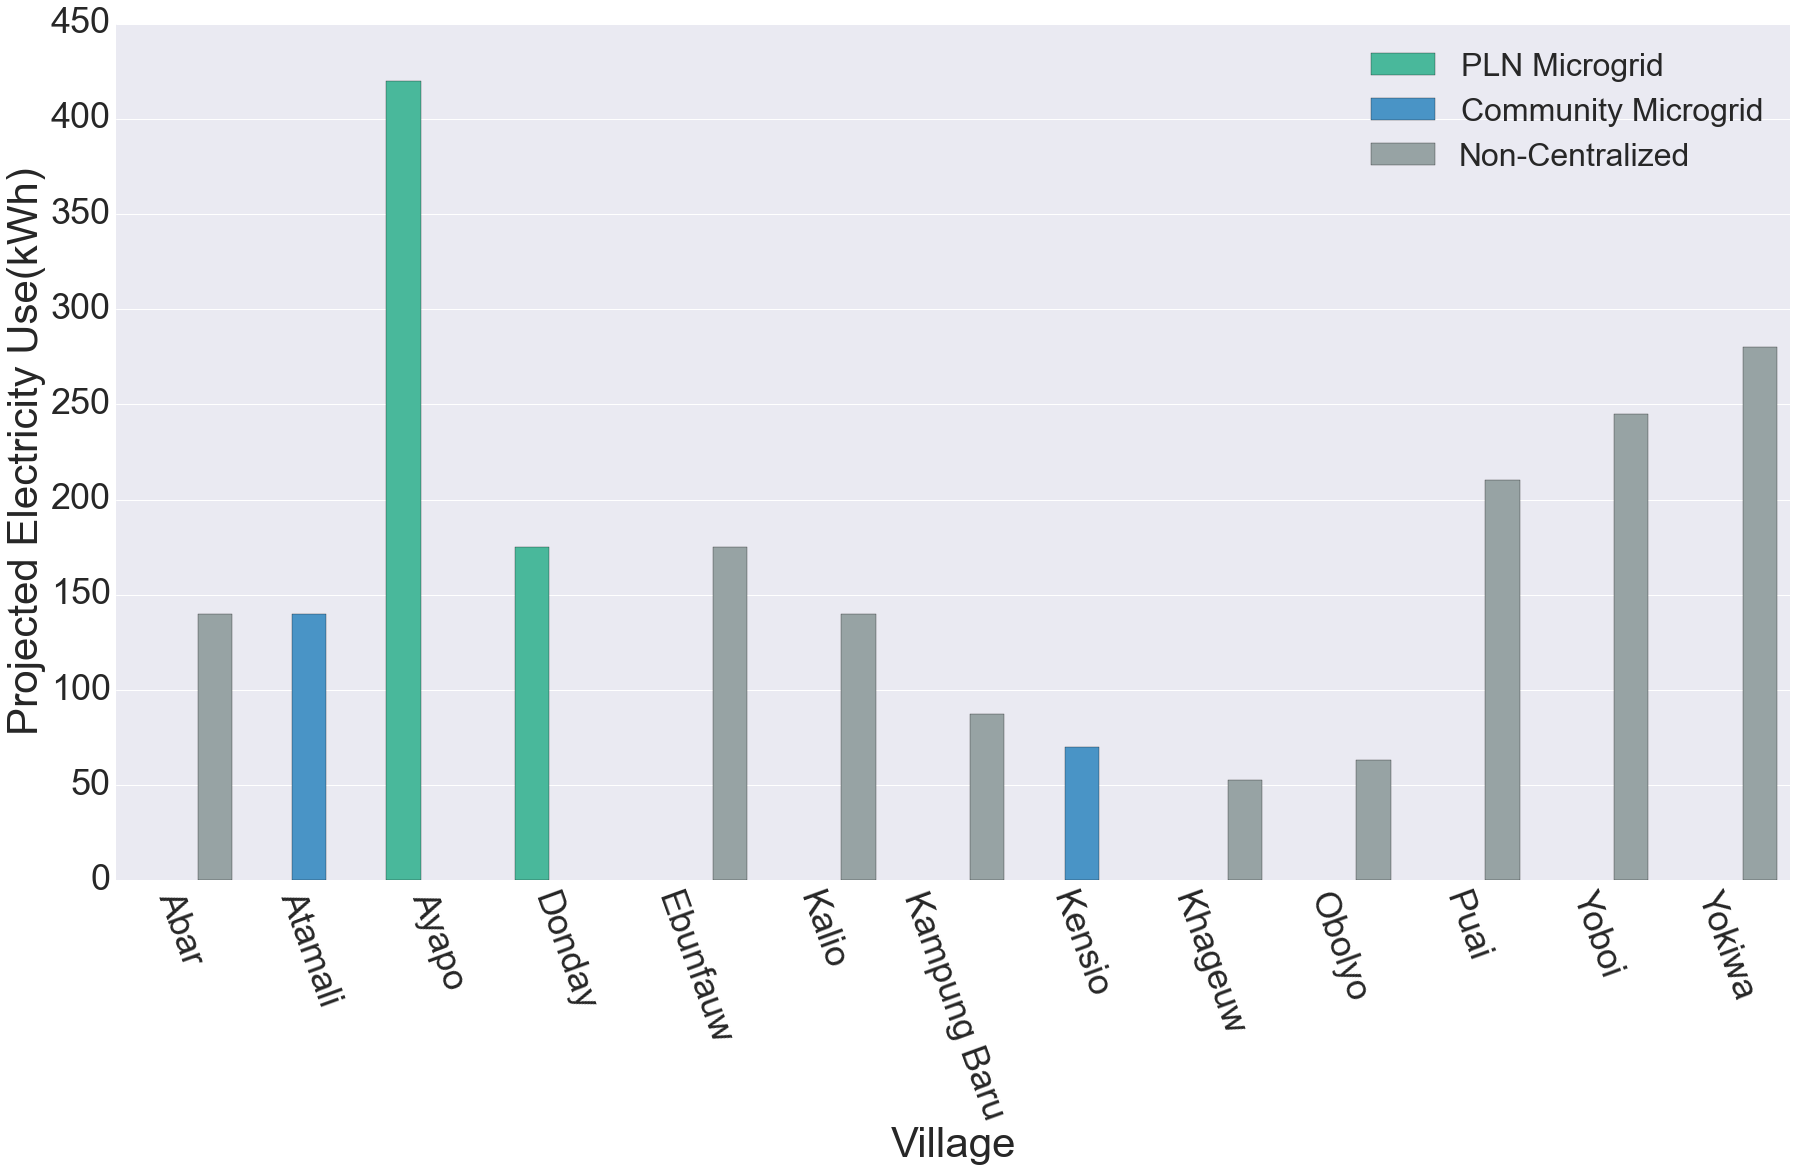

In [9]:
plt.figure(figsize=(30,17))
custom = ["#36CBA4","#3498db", "#95a5a6"]
sns.barplot(x='Village', y='total_daily_energy',hue='Access Type',
            data=off_grid_villages,palette= custom,hue_order=['PLN Microgrid',
            'Community Microgrid','Non-Centralized'])
plt.ylabel('Projected Electricity Use(kWh)', fontsize=42)
plt.xlabel('Village', fontsize=42)
plt.xticks(rotation=-70)
plt.tick_params(labelsize=36)
plt.legend(prop={'size':32})
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('projected-off-grid-energy-use.png')

In [10]:
#survey['village_name'].value_counts()